In [1]:
import pandas as pd # Librairie pour gérer les tableaux de données et les formats étranges
import matplotlib.pyplot as plt
import numpy as np
import os


## Travail en cours, non terminé.

#### Ce notebook propose divers codes permettant d'effectuer rapidement et simplement la lecture de fichiers de mesure obtenus à partir de l'application Physics Toolbox Suite. Tout ceci pourrait être fait avec les méthodes au programme d'informatique de CPGE mais pour des raisons d'ordre pratique, utiliser des librairies existantes pour pouvoir se concentrer sur les aspects scientifiques du traitement de la mesure est tout à fait indiqué (dans le cadre du TIPE par exemple).

In [3]:
# J'ai commencé par faire un enregistrement avec mon téléphone de mesure de la direction de la gravité
# (disponible sur tous les smartphones -> Permet de contrôler le changement d'orientation de l'écran)
# Selon votre modèle de smartphones vous avez plus ou moins de capteurs disponibles (accéléromètres / gyroscopes)

# J'ai appelé mon fichier doublelooping.csv (j'ai fait faire 2 looping à mon téléphone)

# Avant toute chose, il faut placer l'environnement python dans le dossier qui contient le fichier à lire:


#chemin_fichier = '/Lesupercheminpourallerjusquaudossierquicontientlesmesures' # se référer au td lecture de fichier
# pour se rappeler comment faire ça
#os.chdir(chemin_fichier)

#### Maintenant que python s'éxecute au bon endroit, on peut lire le fichier

In [4]:
# Pour lire le fichier et faire le prétraitement, j'utilise la librairie pandas.
df_mes_donnees = pd.read_csv('doublelooping.csv',sep=';') # Ici les données sont séparées par des ;, je le précise à python

In [5]:
## Voyons à quoi ressemble le fichier : je n'affiche que les premières lignes avec la méthode head():
df_mes_donnees.head()

,time,gFx,gFy,gFz,TgF
0,"0,007000","0,0307","-0,0043","0,9844","0,985"
1,"0,008000","0,0302","-0,0023","0,9854","0,986"
2,"0,015000","0,0302","-0,0028","0,9864","0,987"
3,"0,026000","0,0321","-0,0028","0,9859","0,986"
4,"0,031000","0,0297","-0,0038","0,9854","0,986"


#### Le tableau (appelé dataframe dans la librairie pandas) contient 5 colonnes : 
1. La première correspond aux instants auxquels la mesure a été faite. Selon les paramètres de votre téléphone cette date peut être dans un format indiquant jour heures minutes secondes. Le code pour traîter de telles données de temps est présenté à la fin du notebook. 
2. Les 2,3 et 4e colonnes contiennent la mesure de l'accélération du téléphone sur 3 vecteurs d'un référentiel lié au téléphone. L'unité ici est l'accélération de la pesanteur: si l'une des composantes vaut 1 et si le téléphone est immobile, alors ça veut dire que le vecteur associé à cette composante est de même sens et direction que g. Si on retourne le téléphone, cette composante vaudra -1. Si on lache le téléphone en l'air, normalement on mesurera 0 (mais pas pendant très longtemps ...)
3. La 5eme colonne correspond à la norme de l'accélération mesurée (également en nombre de fois g). Si TgF vaut 1, alors le téléphone n'est soumis qu'à une accélération qui vaut g (téléphone immobile ou translation rectiligne uniforme). On peut évidemment retrouver cette colonne à partir des 2, 3 et 4.

#### Avant toutes choses, on remarque que les nombres à virgule sont indiqués avec des , et non des . on commence donc par effectuer les remplacement et convertir toutes les valeurs en flottant:

In [6]:
df_mes_donnees=df_mes_donnees.apply(lambda x: x.str.replace(',','.'))  # Je remplace les , par des . pour 
df_mes_donnees = df_mes_donnees.astype(float) # les convertir en flottant.

In [7]:
df_mes_donnees.head()

,time,gFx,gFy,gFz,TgF
0,0.007,0.0307,-0.0043,0.9844,0.985
1,0.008,0.0302,-0.0023,0.9854,0.986
2,0.015,0.0302,-0.0028,0.9864,0.987
3,0.026,0.0321,-0.0028,0.9859,0.986
4,0.031,0.0297,-0.0038,0.9854,0.986


#### On va maintenant afficher nos mesures. On peut soit tout convertir en un tableau numpy de la manière suivante:

In [8]:
donnees_numeriques = df_mes_donnees.values # Transformation en tableau numpy
print(type(donnees_numeriques))
print(donnees_numeriques[:5,:]) # On n'affiche que les 5 premières lignes du tableau

<class 'numpy.ndarray'>
[[ 0.007   0.0307 -0.0043  0.9844  0.985 ]
 [ 0.008   0.0302 -0.0023  0.9854  0.986 ]
 [ 0.015   0.0302 -0.0028  0.9864  0.987 ]
 [ 0.026   0.0321 -0.0028  0.9859  0.986 ]
 [ 0.031   0.0297 -0.0038  0.9854  0.986 ]]


#### Mais pandas permet également d'accéder directement à une colonne par son nom ! par exemple :

df_mes_donnees['time'] correspond à la colonne qui correspond au temps

df_mes_donnees[['time','gFx']] correspond au dataframe (tableau en pandas) qui ne contient que ces 2 colonnes

Les deux codes d'affichage ci-dessous sont donc équivalents (faites votre choix)

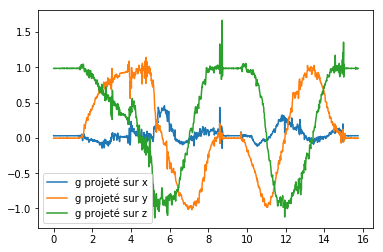

In [9]:
plt.plot(donnees_numeriques[:,0],donnees_numeriques[:,1])
plt.plot(donnees_numeriques[:,0],donnees_numeriques[:,2])
plt.plot(donnees_numeriques[:,0],donnees_numeriques[:,3])
plt.legend(['g projeté sur x','g projeté sur y','g projeté sur z'])

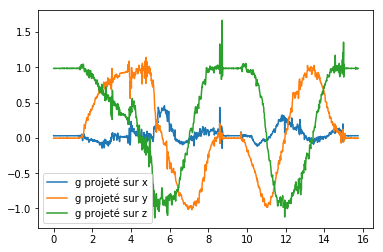

In [10]:
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFx']) # C'est plus lisible quand même ! On comprend ce qu'on trace
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFy'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFz'])
plt.legend(['g projeté sur x','g projeté sur y','g projeté sur z'])

#### Globalement j'ai essayé de faire faire un looping à mon téléphone dans un sens puis dans l'autre autour de l'axe x selon lequel l'accélération mesurée reste nulle . Regardons ça de plus près en enlevant la mesure selon x.

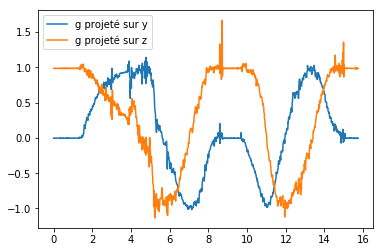

In [11]:
#plt.plot(df_mes_donnees['time'],df_mes_donnees['gFx'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFy'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFz'])
plt.legend(['g projeté sur y','g projeté sur z'])

#### Partons du principe que je n'ai pas trop secoué le téléphone et que je mesure donc que des projections de l'accélération de la pesanteur. Celà veut dire que la norme du vecteur accélération mesuré vaut toujours 1. Je vais donc rediviser chaque composante par la norme du vecteur accélération pour forcer cette hypothèse sur mes données:

In [12]:
# Version en utilisant numpy: 
gy_normalise = donnees_numeriques[:,2]/np.sqrt(donnees_numeriques[:,2]**2+donnees_numeriques[:,3]**2)
gz_normalise = donnees_numeriques[:,3]/np.sqrt(donnees_numeriques[:,2]**2+donnees_numeriques[:,3]**2)
# REMARQUE : j'ai fait l'hypothèse que l'accélération selon x vaut 0 comme supposé précédemment, c'est 
# pourquoi donnees_numeriques[:,1] n'apparait pas dans le terme au dénominateur.


#### Vérifions que les nouvelles courbes n'ont pas été trop modifiées en forçant nos hypothèses:


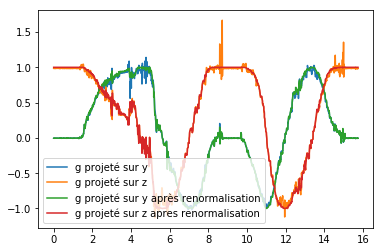

In [13]:
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFy'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFz'])
plt.plot(df_mes_donnees['time'],gy_normalise)
plt.plot(df_mes_donnees['time'],gz_normalise)
plt.legend(['g projeté sur y','g projeté sur z','g projeté sur y après renormalisation','g projeté sur z apres renormalisation'])

#### Bon assez clairement nos hypothèses n'ont pas énormément changé les courbes à part aux moments où j'ai tremblé dans ma mesure (pic à 8 s). On va utiliser ces mesures pour remonter au positionnement du téléphone dans l'espace en fonction du temps.

#### Appelons $\theta$ l'angle (y,g):

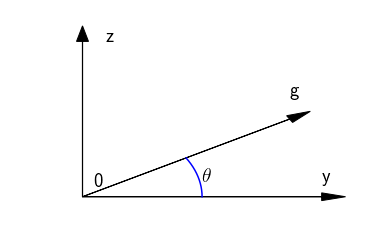

In [14]:
plt.rc('text', usetex=True)

plt.arrow(0, 0, 1, 0,head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, 0, 1,head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, np.sqrt(3)/2, 1/2,head_width=0.05, head_length=0.1, fc='k', ec='k')
# flèche circulaire : 
theta = np.arange(0,np.pi/6,0.001)
x_theta = np.cos(theta)/2
y_theta = np.sin(theta)/2
plt.text(1/2,0.1,r'$\theta$',size = 20)
plt.plot(x_theta,y_theta,'blue')
#plt.arrow(x_theta[-5],y_theta[-5],x_theta[-1],y_theta[-1],head_width=0.01, head_length=0.1, fc='b', ec='b')
plt.text(0.05,0.07,'0',size = 20)
plt.text(1,0.1,'y',size = 20)
plt.text(0.1,1,'z',size = 20)
plt.text(np.sqrt(3)/2, 1/2+0.15,'g',size=20)
plt.axis('off')
plt.xlim(-0.2,1.2)
ax=plt.ylim(-0.2,1.2)




## But : Calculer cet angle (pour connaitre la position angulaire du téléphone en fonction du temps).

on a alors $y = cos(\theta)$  et $z= sin(\theta)$, en effet ici quand $\theta = 0$, on a z aligné avec y et quand $\theta = \pi /2$, on a bien z qui est aligné avec g. 

#### $\theta = \arctan(\frac{z}{y})$

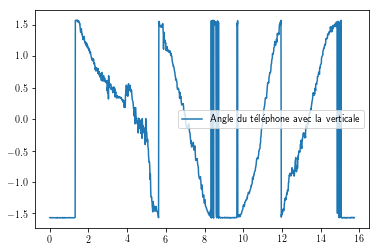

In [23]:
theta = np.arctan(df_mes_donnees['gFz']/df_mes_donnees['gFy'])
t = df_mes_donnees['time'].values
plt.plot(df_mes_donnees['time'],theta)
plt.legend(['Angle du téléphone avec la verticale'])

#### Aie aie chaque passage par 0 du terme au dénominateur pose problème, heureusement les gens ont prévu le coup et proposent une variante de l'arctan sans division par 0 (avec des entrées séparées pour les ordonnées et les abscisses:

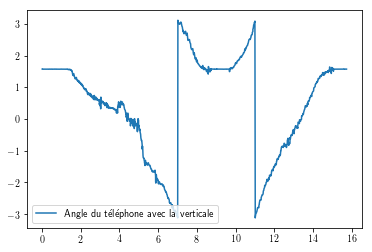

In [25]:
theta = np.arctan2(df_mes_donnees['gFz'],df_mes_donnees['gFy'])
t = df_mes_donnees['time'].values
plt.plot(df_mes_donnees['time'],theta)
plt.legend(['Angle du téléphone avec la verticale'])

#### C'est mieux mais c'est touours pas ça, si l'angle passe en dessous ou au dessus de 2pi la valeur saute de l'autre coté des ordonnées. Le fait de reconstruire l'angle absolu en évitant ces sauts est appelé angle lifting. On ne peut que bricoler des codes pour gérer ça, l'exemple ci-dessous est l'un de ces bricolages.

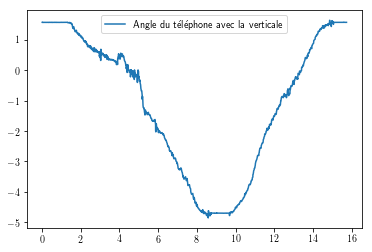

In [29]:
theta = np.arctan2(df_mes_donnees['gFz'],df_mes_donnees['gFy'])
theta_continu = []
last = 0
for angle in theta:
    while angle < last-np.pi: angle += 2*np.pi
    while angle > last+np.pi: angle -= 2*np.pi
    last = angle
    theta_continu.append(angle)
t = df_mes_donnees['time'].values
plt.plot(df_mes_donnees['time'],theta_continu)
plt.legend(['Angle du téléphone avec la verticale'])

#### On peut faire une petite animation pour mieux se représenter ce qui se passe, on affiche le mouvement d'un vecteur fixe dans le référentiel lié au téléphone en fonction du temps. Celle-ci s'affiche si vous relancez le code en local. A noter que j'ai introduit une variable facteur_reduction qui permet de ne pas afficher toutes les frames (ici une sur 5) pour que la vidéo soit moins longue à construire.

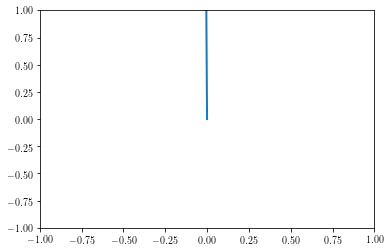

In [30]:
from matplotlib import animation, rc



# Nécessite le package ffmpeg
# sur windows : http://www.wikihow.com/Install-FFmpeg-on-Windows
# Sur Mac Os -> installez homebrew (vous trouverez facilement sur internet) puis dans le terminal
# brew install ffmpeg


# On construit la figure vide


fig, ax = plt.subplots()

ax.set_xlim(( -1, 1))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)

# On peut initialiser avec des choses à afficher, ici on ne met rien
def init():
    line.set_data([], [])
    return (line,)

# la fonction suivante incorpore dans la figure ce que l'on souhaite afficher dans la frame i
# (Rappel : une vidéo est constituée de frames qui sont des images qui défilent rapidement)

facteur_reduction = 5 # Je ne prend qu'une frame sur 5 pour réduire la taille de la vidéo.
def animate(i):
    # Cette fonction doit 
    x = [0,gy_normalise[facteur_reduction*i]]
    y = [0,gz_normalise[facteur_reduction*i]]
    line.set_data(x, y)
    return (line,)

n_frames = len(gy_normalise)//facteur_reduction # Il n'y a qu'un 5e de la vidéo pour que ce ne soit pas trop long
interval_t = (t[-1]- t[0])/len(t)*1000*facteur_reduction # durée moyenne entre 2 frames en ms .
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_frames, interval=interval_t, blit=True) # interval correspond à l'intervale de temps
# entre 2 frames affichées en ms. 

rc('animation', html='html5')
#rc('animation', html='jshtml') # Cette ligne permet de générer une application pour naviguer dans la vidéo
# Il suffit de la décommenter et commenter à la place la ligne précédente.

anim

#### Remarque : J'ai réutilisé l'intervalle de temps entre 2 mesures pour générer l'animation, l'écoulement du temps dans la vidéo est donc à l'image de la mesure réelle, mais on pourrait le réduire où l'allonger au choix. 

# Cas d'un fichier de mesure à partir du gyroscope:

In [16]:
df_gyro = pd.read_csv('mesure_gyroscope.csv',sep=';')
df_gyro.head()

,time,wx (rad/s),wy (rad/s),wz (rad/s)
0,"0,001","0,00","-0,06","-0,01"
1,"0,002","-0,03","-0,04","-0,01"
2,"0,002","-0,06","-0,03","-0,01"
3,"0,002","-0,09","-0,01","-0,01"
4,"0,003","-0,12","0,00","-0,01"


In [17]:
# On fait les même traitements que dans la partie 1 :
df_gyro=df_gyro.apply(lambda x: x.str.replace(',','.'))  # Je remplace les , par des . pour 
df_gyro = df_gyro.astype(float) # les convertir en flottant.

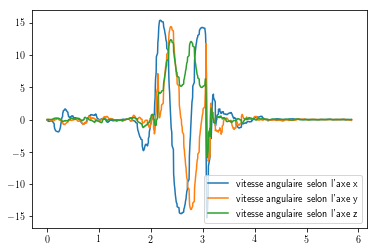

In [18]:
plt.plot(df_gyro['time'],df_gyro['wx (rad/s)'])
plt.plot(df_gyro['time'],df_gyro['wy (rad/s)'])
plt.plot(df_gyro['time'],df_gyro['wz (rad/s)'])
plt.legend(["vitesse angulaire selon l'axe x","vitesse angulaire selon l'axe y","vitesse angulaire selon l'axe z"])

#### Et si je souhaite intégrer les vitesses angulaires c'est à dire les fonctions $u \to \dfrac{d\theta (u)}{du}$ ? 
#### On a alors $\theta(t) = \int_{0}^t \dfrac{d\theta (u)}{du} du$, ce que l'on peut faire en utilisant la méthode des rectangles par exemple. 

In [19]:
wx = df_gyro['wx (rad/s)'].values
wy = df_gyro['wy (rad/s)'].values
wz = df_gyro['wz (rad/s)'].values
t = df_gyro['time'].values
theta_x = [0]
theta_y = [0]
theta_z = [0]
for i in range(1,len(wx)):
    t_i = t[i]
    t_i_m1 = t[i-1]
    theta_x += [theta_x[i-1] + (t_i-t_i_m1)*wx[i]] # méthode des rectangle à droite, on peut changer
    # A noter que je n'ai pas supposé que la période d'échantillonage est constante, j'ai directement 
    # pris les instants donnés par la mesure et je calcule à la main le delta t . 
    theta_y += [theta_y[i-1] + (t_i-t_i_m1)*wy[i]]
    theta_z += [theta_z[i-1] + (t_i-t_i_m1)*wz[i]]
    

Text(0.5, 1.0, "Mesure de la position angulaire du téléphone (rad) en fonction du temps\nici on a fait un tour autour de l'axe z")

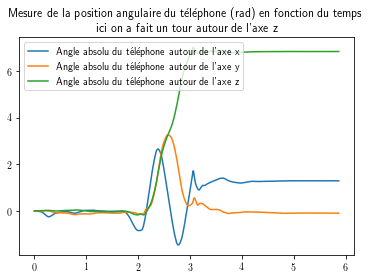

In [20]:

plt.plot(t,theta_x)
plt.plot(t,theta_y)
plt.plot(t,theta_z)
plt.legend(["Angle absolu du téléphone autour de l'axe x","Angle absolu du téléphone autour de l'axe y","Angle absolu du téléphone autour de l'axe z"],loc='upper left')
plt.title("Mesure de la position angulaire du téléphone (rad) en fonction du temps\nici on a fait un tour autour de l'axe z") 


# Cas de données où la mesure temporelle contient la date entière

In [4]:
# Traitement de données - cas où les instants de mesure sont au format timedate
df2 = pd.read_csv('experience_2.csv')
df2.head()

,time,ax,ay,az
0,2020-05-12 11:18:08.0450,0.01,-0.01,-0.02
1,2020-05-12 11:18:08.1370,-0.00,0.00,-0.01
2,2020-05-12 11:18:08.2370,-0.00,0.00,0.00
3,2020-05-12 11:18:08.3360,0.00,0.01,0.00
4,2020-05-12 11:18:08.4370,0.00,0.00,0.00


In [5]:
# On fait les mêmes prétraitements que dans la partie 1:
df2.head()

,time,ax,ay,az
0,2020-05-12 11:18:08.0450,0.01,-0.01,-0.02
1,2020-05-12 11:18:08.1370,-0.00,0.00,-0.01
2,2020-05-12 11:18:08.2370,-0.00,0.00,0.00
3,2020-05-12 11:18:08.3360,0.00,0.01,0.00
4,2020-05-12 11:18:08.4370,0.00,0.00,0.00


#### On voit que le format de date n'est pas sympathique. La librairie pandas permet de convertir sans peine ces données en ms.

In [6]:
df2['time'] = pd.to_datetime(df2['time'])
# Maintenant python comprend que c'est une date.

In [7]:
df2['time0']= df2['time'].min() # On crée une nouvelle colonne qui contient la date de départ de l'expérience
# On supprime cette colonne juste après
df2['elapsed time'] = (df2['time']- df2['time0']).dt.total_seconds() # On fait date de la mesure - date de début pour connaitre
# l'instant où les mesures sont faites
del df2['time0'],df2['time'] # On dégage les colonnes qui ne servent plus. 
 

In [8]:
df2.head()

,ax,ay,az,elapsed time
0,0.01,-0.01,-0.02,0.000
1,-0.00,0.00,-0.01,0.092
2,-0.00,0.00,0.00,0.192
3,0.00,0.01,0.00,0.291
4,0.00,0.00,0.00,0.392


#### La colonne elapsed time contient maintenant les instants auxquels les mesures sont faites, comptées en s et en commençant à t=0s. On peut transformer ce tableau en numpy.array pour la suite du traitement :

In [9]:
tableau_valeurs = df2.values
print(type(tableau_valeurs))

<class 'numpy.ndarray'>


# Spatialisation des mesures, transformer son téléphone en capteur de position.

#### Pour aller plus loin dans l'utilisation de l'application, il faut avoir un téléphone qui dispose d'un capteur gyroscopique, on utilise maintenant une mesure plus complète.

In [2]:
df1=pd.read_csv('Mesure_accelero_1.csv',sep=';')
df1.head()

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Bx,By,Bz,I,Azimuth,Pitch,Roll,Unnamed: 17
0,"0,0220","-0,0207","0,0895","0,9147","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",NaN
1,"0,0410","-0,0212","0,0981","0,8801","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",NaN
2,"0,0510","-0,0705","0,1520","0,8560","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",NaN
3,"0,0660","-0,1032","0,1800","0,8548","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",NaN
4,"0,0760","-0,1032","0,1800","0,8548","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","-23,3566","4,3793","-37,2025","0,0000","0,0000","0,0000","0,0000",NaN


#### On remarque la présence d'une colonne contenant des NaN (Not a Number), bon c'est bizare, ça semble être un problème de lecture, on va commencer par les virer

In [3]:
df1 = df1.dropna(axis = 1) # permet de supprimer les colonnes avec des NaN.
df1.head() # C'est bon plus de NaN

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Bx,By,Bz,I,Azimuth,Pitch,Roll
0,"0,0220","-0,0207","0,0895","0,9147","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000"
1,"0,0410","-0,0212","0,0981","0,8801","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000"
2,"0,0510","-0,0705","0,1520","0,8560","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000"
3,"0,0660","-0,1032","0,1800","0,8548","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000"
4,"0,0760","-0,1032","0,1800","0,8548","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","-23,3566","4,3793","-37,2025","0,0000","0,0000","0,0000","0,0000"


In [4]:
# On fait les même traitements que dans la partie 1 :
df1=df1.apply(lambda x: x.str.replace(',','.'))  # Je remplace les , par des . pour 
df1 = df1.astype(float) # les convertir en flottant.
t = df1['time'].values
df1.shape
#df2=pd.read_csv('mesure_Gyro_last.csv',sep=';')


(731, 17)

#### On affiche tout d'abord les données issues du tableau puis une version animée dans l'espace.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation



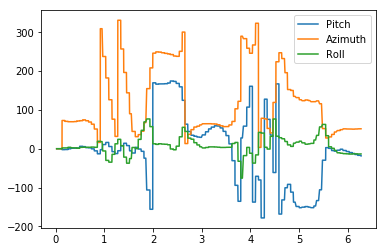

In [6]:
plt.plot(df1['time'].values,df1['Pitch'].values)
plt.plot(df1['time'].values,df1['Azimuth'].values)
plt.plot(df1['time'].values,df1['Roll'].values)
plt.legend(['Pitch','Azimuth','Roll'])

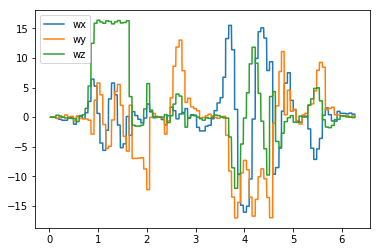

In [27]:
plt.plot(df1['time'].values,df1['wx'].values)
plt.plot(df1['time'].values,df1['wy'].values)
plt.plot(df1['time'].values,df1['wz'].values)
plt.legend(['wx','wy','wz'])

In [30]:
wx=df1['wx'].values
wy = df1['wy'].values
wz = df1['wz'].values
t = df1['time'].values
theta_x = [0]
theta_y = [0]
theta_z = [0]
for i in range(1,len(wx)):
    t_i = t[i]
    t_i_m1 = t[i-1]
    theta_x += [theta_x[i-1] + (t_i-t_i_m1)*wx[i]] # méthode des rectangle à droite, on peut changer
    # A noter que je n'ai pas supposé que la période d'échantillonage est constante, j'ai directement 
    # pris les instants donnés par la mesure et je calcule à la main le delta t . 
    theta_y += [theta_y[i-1] + (t_i-t_i_m1)*wy[i]]
    theta_z += [theta_z[i-1] + (t_i-t_i_m1)*wz[i]]

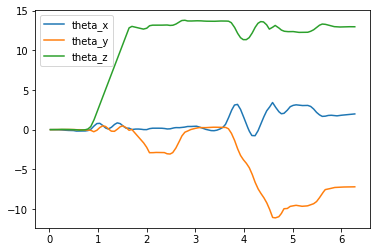

In [31]:
plt.plot(df1['time'].values,theta_x)
plt.plot(df1['time'].values,theta_y)
plt.plot(df1['time'].values,theta_z)
plt.legend(['theta_x','theta_y','theta_z'])

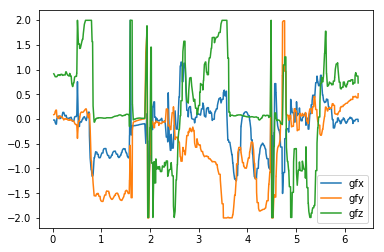

In [29]:
plt.plot(df1['time'].values,df1['gFx'].values)
plt.plot(df1['time'].values,df1['gFy'].values)
plt.plot(df1['time'].values,df1['gFz'].values)
plt.legend(['gfx','gfy','gfz'])

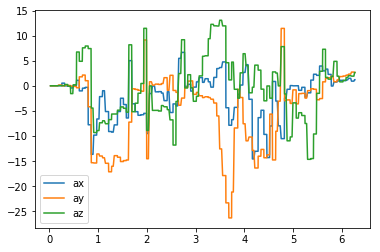

In [30]:
plt.plot(df1['time'].values,df1['ax'].values)
plt.plot(df1['time'].values,df1['ay'].values)
plt.plot(df1['time'].values,df1['az'].values)
plt.legend(['ax','ay','az'])

In [27]:
ax = df1['ax'].values
ay = df1['ay'].values
az = df1['az'].values
t = df1['time'].values
v_x = [0]
v_y = [0]
v_z = [0]
X,Y,Z = [0,0],[0,0],[0,0]
for i in range(1,len(ax)):
    t_i = t[i]
    t_i_m1 = t[i-1]
    v_x += [v_x[i-1] + (t_i-t_i_m1)*ax[i]] # méthode des rectangle à droite, on peut changer
    # A noter que je n'ai pas supposé que la période d'échantillonage est constante, j'ai directement 
    # pris les instants donnés par la mesure et je calcule à la main le delta t . 
    v_y += [v_y[i-1] + (t_i-t_i_m1)*ay[i]]
    v_z += [v_z[i-1] + (t_i-t_i_m1)*az[i]]
    if i>1:
        X += [X[i-2] + (t_i-t_i_m1)*v_x[i]]
        Y += [Y[i-2] + (t_i-t_i_m1)*v_y[i]]
        Z += [Z[i-2] + (t_i-t_i_m1)*v_z[i]]

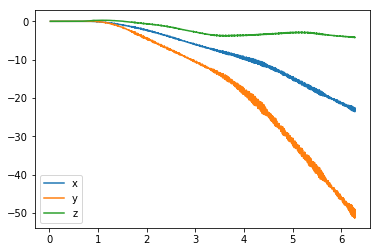

In [28]:
plt.plot(df1['time'].values,X)
plt.plot(df1['time'].values,Y)
plt.plot(df1['time'].values,Z)
plt.legend(['x','y','z'])

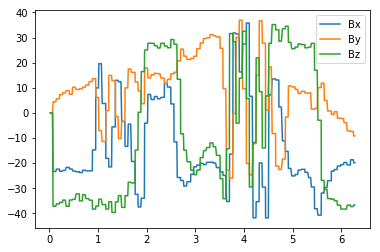

In [24]:
plt.plot(df1['time'].values,df1['Bx'].values)
plt.plot(df1['time'].values,df1['By'].values)
plt.plot(df1['time'].values,df1['Bz'].values)
plt.legend(['Bx','By','Bz'])

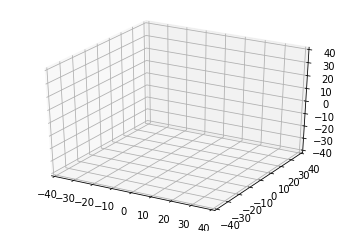

In [29]:
from matplotlib import animation, rc

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

v_1 = [np.cos()]


def get_arrow(i):
    x = X[i]
    y = Y[i]
    z = Z[i]
    u = df1['Bx'][i]
    v = df1['By'][i]
    w = df1['Bz'][i]
    return x,y,z,u,v,w

quiver = ax.quiver(*get_arrow(0))

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-40, 40)

def update(i):
    global quiver
    quiver.remove()
    quiver = ax.quiver(*get_arrow(i))

ani = FuncAnimation(fig, update, frames=range(len(t)), interval=50)
rc('animation', html='html5')
ani

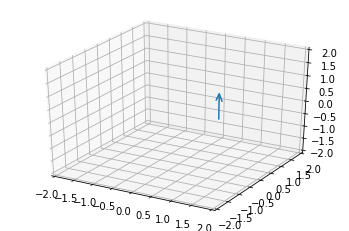

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def get_arrow(theta):
    x = np.cos(theta)
    y = np.sin(theta)
    z = 0
    u = np.sin(2*theta)
    v = np.sin(3*theta)
    w = np.cos(3*theta)
    return x,y,z,u,v,w

quiver = ax.quiver(*get_arrow(0))

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

def update(theta):
    global quiver
    quiver.remove()
    quiver = ax.quiver(*get_arrow(theta))

ani = FuncAnimation(fig, update, frames=np.linspace(0,2*np.pi,200), interval=50)
plt.show()

array(['0,0000', '0,0000', '0,0000', '0,0000', '0,0000', '0,0000',
       '0,0000', '0,0000', '0,0000', '0,0000', '-2,3887', '-2,3887',
       '-2,3887', '-2,3887', '-2,3887', '-2,0981', '-2,0981', '-2,0981',
       '-2,0981', '-2,0981', '-2,0981', '-2,0981', '-2,0981', '-2,0981',
       '-0,2182', '-0,2182', '-0,2182', '-0,2182', '-0,2182', '-0,2182',
       '-0,2182', '1,2097', '1,2097', '1,2097', '1,2097', '1,2097',
       '1,2097', '1,2097', '1,4428', '1,4428', '1,4428', '1,4428',
       '1,4428', '1,4428', '1,4428', '1,4428', '1,9889', '1,9889',
       '1,9889', '1,9889', '1,9889', '1,9889', '1,9889', '6,2115',
       '6,2115', '6,2115', '6,2115', '6,2115', '6,2115', '6,2115',
       '5,3489', '5,3489', '5,3489', '5,3489', '5,3489', '5,3489',
       '2,9430', '2,9430', '2,9430', '2,9430', '2,9430', '2,9430',
       '2,9430', '2,3545', '2,3545', '2,3545', '2,3545', '2,3545',
       '2,3545', '2,3545', '-0,3233', '-0,3233', '-0,3233', '-0,3233',
       '-0,3233', '-0,3233', '-5,5206

# Traitement de données, opérations standard

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

#### Statistiques utiles pour les TIPE

In [28]:

l=np.random.rand(10) # 10 points tirés selon une variable aléatoire uniforme sur [0,1]
lval = np.array(l)

#### moyenne
moy = np.mean(lval)

####variance d'échantillon 
var = np.var(lval)

sigma= np.std(lval)

#### Régression linéaire

In [29]:
#On se donne un certain nombre d'abscisses :
pente_ = 3.2
ordonnee_orig_ = -4.4

x = np.array([-1.1,-0.5,0.1,0.2,0.3,0.4,0.64,0.8,1.04,1.2,1.4,1.5])
y = pente_*x + ordonnee_orig_
moyenne_bruit = 0
var_bruit = 0.8
y_bruit = np.random.normal(moyenne_bruit,var_bruit,len(x))+y

Le code précédent montre que $y$ et $x$ sont reliés par une relation affine y = pente * x + ordonnee_orig_. En pratique lorsqu'on fait des expériences, on n'observe jamais un tel $y$ mais plutot une version bruitée, ici modélisée par y_bruit qui correspond au vecteur de mesure $y$ corrompu par un bruit gaussien centrée de variance 0.3.

#### But : à partir d'une mesure expérimentale (x,y_bruit), retrouver informatiquement les coefficients pente et ordonnee_orig

In [30]:
# On utilise la régression linéaire inclue dans le module scipy.stats:
help(scs.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [31]:
# En se basant sur l'aide, on comprend, qu'il vaut utiliser la syntaxe ci-dessous
slope,intercept,coef_corel,pvalue,stderr=scs.linregress(x,y_bruit)
print(slope,intercept,coef_corel)

3.227228603068836 -4.508679946880587 0.9368957437220283


Text(0.5, 1.0, "mesure d'un phénomène physique, données expérimentales\net modèle retrouvé par régression linéaire")

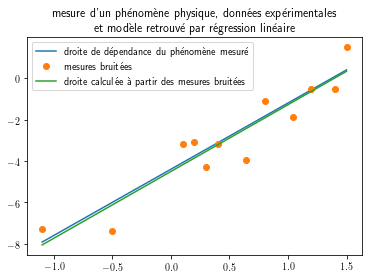

In [32]:
# On peut maintenant tracer la droite avec les coefficients slope (pente en anglais) 
# et intercept obtenus numériquement.
plt.plot(x,y) # Vraie droite
plt.plot(x,y_bruit,'o') # points de mesures (contient le bruit de mesure)
plt.plot(x,slope*x+intercept) # Droite calculee par regression linéaire
plt.legend(['droite de dépendance du phénomène mesuré','mesures bruitées','droite calculée à partir des mesures bruitées'])
plt.title("mesure d'un phénomène physique, données expérimentales\net modèle retrouvé par régression linéaire")

#### A noter : par défaut on effectue une régression affine ( l'ordonnée à l'origine est stockée dans la variable intercept)

In [ ]:



##-------------------------------------------------------
##4. Interpolation et calculs automatique de dÃ©rivÃ©es
##-------------------------------------------------------
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

### I. Lecture du fichier de mesure 
##f=open('potAgCl.csv')
##data=f.readlines()
##f.close()
####print(data)
##x,y=[],[]
##for donnee in data :
##    pointexp=donnee[:-1].split(';')
##    ##print(pointexp)
##    x.append(eval(pointexp[0]))
##    y.append(eval(pointexp[1]))
##
####II. Interpolation et calcul des dÃ©rivÃ©es
##s=UnivariateSpline(x,y,s=0)## gardez ces reglages !
##d=s.derivative()
##dd=s.derivative(n=2)
##ys = s(x)
##yd=d(x)
##ydd=dd(x)
##
####III. TracÃ© des courbes 
##ymax=max(abs(ys))
##dmax=max(abs(yd))
##ddmax=max(abs(ydd))
##plt.plot(x, ys/ymax,'k',label='ddp')
##plt.plot (x,yd/dmax,'r',label='derivee')
##plt.plot(x,ydd/ddmax,'g', label='derivee seconde')
##plt.axhline()
##plt.legend(loc='upper right')
##plt.show()

###-----------------------------------------------------------------
##5. Nonlinear Curve-fitting
##-------------------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco

## les donnÃ©es
les_S = np.array([0.138, 0.220, 0.291, 0.560, 0.766, 1.460])*1e-3
les_V = np.array([0.148, 0.171, 0.234, 0.324, 0.390, 0.493])*1e-6

## la fonction Ã  fitter 
def v_a_fiter(S, Km, vm):
    return vm*S/(S+Km)

## on lance le calcul
popt, pcov = sco.curve_fit(v_a_fiter,les_S,les_V,p0=[5e-4,5e-7])
print('calcul de Km ,Vm :',popt)

##Le tracÃ© avec une belle dÃ©co
collec_bidon_de_S=np.linspace(0.1,1.5,200)*1e-3
fittedV = v_a_fiter(collec_bidon_de_S, *popt)
plt.plot(les_S, les_V*1e7, 'or',label='donnÃ©es')
plt.plot(collec_bidon_de_S, fittedV*1e7,label='hyperbole optimisÃ©e')
plt.xlabel('[S]')
plt.ylabel('1e7 V')
plt.legend()
plt.title("Exemple d'enzyme Michaelienne")
plt.show()
##--------------------------------------------------------
##C. TracÃ© statistiques
##--------------------------------------------------------
##1.Calculs des barres d'erreurs
##def barrerr(liste):
##    n=len(liste)
##    import scipy.stats as scs
##    import numpy as np
##    coef=scs.t.ppf(0.975,df=n-1)
##    sigmaEch= np.std(liste, ddof = 1)
##    return sigmaEch*coef/np.sqrt(n)
##    
####test 
##l=[19.4,19.5,19.6,19.8,20.1,20.3]
##print(barrerr(l))
##--------------------------------------------------------
####2. Trace d'un barplot
##import matplotlib.pyplot as plt
##barWidth =0.4
##liste_moy_caractere1 = [1, 2, 4, 3]
##liste_barre_erreur1=[0.1,0.2,0.2,0.4]
##liste_moy_caractere2  = [3, 4, 4, 3]
##x1 = range(len(liste_moy_caractere1))## un itÃ©rateur pour la liste des abscisses des barres
##x2 = [x + barWidth for x in x1]##un itÃ©rateur pour la liste des abscisses des barres decalÃ© de barWidth par rapport au prÃ©cÃ©dent
##
##plt.bar(x1, liste_moy_caractere1, yerr=liste_barre_erreur1, width = barWidth, color = ['blue' for i in liste_moy_caractere1],
##           edgecolor = None,ecolor = 'red', capsize = 10, linewidth = 2,label='bofbof')
##plt.bar(x2, liste_moy_caractere2, width = barWidth, color = ['cyan' for i in liste_moy_caractere2],
##           edgecolor =['black' for i in liste_moy_caractere2], linewidth = 4)
##plt.xticks([r + barWidth / 2 for r in x1], ['A', 'lulu', 'C', 'Marcel'])## position, et nom pour les abcsisses
#### pour le fun  essayez de rajouter  dans le plt.xticks, l'argument supplÃ©mentaire rotation = 45
##plt.title('Barplot moche pour montrer les rÃ©glages')## le titre
##plt.legend()
##plt.show()
##--------------------------------------------------------
### Bonus hors poly. Boites Ã  moustaches
##import matplotlib.pyplot as plt
##data_01 = [1,2,3,4,5,6,7,8,9]
##data_02 = [15,16,17,18,19,20,21,22,23,24,25]
##data_03 = [5,6,7,8,9,10,11,12,13]
##BoxName = ['Lulu','Marcel','Josiane']
##data = [data_01,data_02,data_03]
##plt.boxplot(data)
##plt.ylim(0,30)
##plt.xticks([1,2,3], BoxName)
##plt.show()
##--------------------------------------------------------
##2. histogrammes
##import matplotlib.pyplot as plt
##
###recupÃ©ration des donnÃ©es
##fich=open('datahist.txt','r')
##data=[]
##for line in fich:
##    listeval=line[:-1].split('\t')
##    for elem in listeval:
##        data.append(eval(elem))
##fich.close()
##
###crÃ©ation de l'histogramme python choisit tout seul le nombre de classes 
##plt.hist(x=data, bins='auto', color='blue',edgecolor='black')
#### regardez l'influence du nombre de classes 
####plt.hist(x=data, bins=10, color='blue',edgecolor='black')
##
#### un peu de dÃ©co - valable en general pour matplotlib
##plt.xlabel('Valeur')
##plt.ylabel('Frequence')
##plt.title('Mon joli histogramme')
##plt.text(0.45, 14,'une remarque' )##0.45 et 14 sont les coordonnÃ©es du debut de la remarque
##plt.ylim((0,15))##
##plt.xlim((0.4,0.7))
#### ordre d'affichage ne l'oublez pas ....
##plt.show()